In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rc=pd.read_csv("Reactions.csv")
rc.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [3]:
rc.shape

(25553, 5)

In [4]:
rc.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [5]:
rc=rc.drop(["User ID"], axis=1)
rc.head()

,Unnamed: 0,Content ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [7]:
rc.dropna(inplace=True)

In [8]:
rc.Type.value_counts()

Type
heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: count, dtype: int64

In [9]:
rc["Datetime"]=pd.to_datetime(rc["Datetime"])
rc.head()

,Unnamed: 0,Content ID,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [10]:
rc.rename(columns={"Type":"ReactionType"}, inplace=True)

In [11]:
rc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    24573 non-null  int64         
 1   Content ID    24573 non-null  object        
 2   ReactionType  24573 non-null  object        
 3   Datetime      24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 959.9+ KB


In [12]:
rc=rc.drop(["Unnamed: 0"], axis=1)

In [13]:
con=pd.read_csv("Content.csv")
con.head(5)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [14]:
con=con.drop(["Unnamed: 0"], axis=1)

In [15]:
con.shape

(1000, 5)

In [16]:
con.isnull().sum()

Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [17]:
rc.dtypes

Content ID              object
ReactionType            object
Datetime        datetime64[ns]
dtype: object

In [18]:
con.dtypes

Content ID    object
User ID       object
Type          object
Category      object
URL           object
dtype: object

In [19]:
con=con.drop(["URL"], axis=1)

In [20]:
con.isnull().sum()

Content ID    0
User ID       0
Type          0
Category      0
dtype: int64

In [21]:
con.rename(columns={"Type":"ContentType"}, inplace=True)
con["ContentType"].value_counts()

ContentType
photo    261
video    259
GIF      244
audio    236
Name: count, dtype: int64

In [22]:
con=con.drop(["User ID"], axis=1)
con.head()

,Content ID,ContentType,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [23]:
con["Category"].value_counts()

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

In [24]:
con["Category"]=con["Category"].str.replace('"', '')
con["Category"]=con["Category"].str.title()

In [25]:
con["Category"].value_counts()

Category
Technology         73
Animals            72
Travel             69
Science            68
Culture            67
Fitness            66
Food               64
Soccer             64
Healthy Eating     62
Cooking            61
Tennis             59
Education          59
Studying           58
Dogs               58
Public Speaking    50
Veganism           50
Name: count, dtype: int64

In [26]:
ret=pd.read_csv("ReactionTypes (2).csv")
ret.head(16)

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [27]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [28]:
ret.describe()

,Unnamed: 0,Score
count,16.000000,16.000000
mean,7.500000,39.625000
std,4.760952,26.901983
min,0.000000,0.000000
25%,3.750000,14.250000
50%,7.500000,40.000000
75%,11.250000,66.250000
max,15.000000,75.000000


In [29]:
ret=ret.drop(["Unnamed: 0"], axis=1)

In [30]:
ret.rename(columns={"Type":"ReactionType"}, inplace=True)

In [31]:
ret.value_counts()

ReactionType  Sentiment  Score
adore         positive   72       1
cherish       positive   70       1
disgust       negative   0        1
dislike       negative   10       1
hate          negative   5        1
heart         positive   60       1
indifferent   neutral    20       1
interested    positive   30       1
intrigued     positive   45       1
like          positive   50       1
love          positive   65       1
peeking       neutral    35       1
scared        negative   15       1
super love    positive   75       1
want          positive   70       1
worried       negative   12       1
Name: count, dtype: int64

In [32]:
tp=rc.merge(con, on="Content ID")
tp

,Content ID,ReactionType,Datetime,ContentType,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,Technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,Technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,Technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,Technology


In [35]:
tp=tp.merge(ret, on="ReactionType")
tp

,Content ID,ReactionType,Datetime,ContentType,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,Healthy Eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,Healthy Eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,Veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,Veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,Culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,Culture,positive,72


In [37]:
tp_f=tp.groupby("Category")["Score"].sum().sort_values(ascending=False)

In [38]:
tp_f.head()

Category
Animals           74965
Science           71168
Healthy Eating    69339
Technology        68738
Food              66676
Name: Score, dtype: int64

In [39]:
tp.to_csv("clientdatas.csv")

In [41]:
tp.groupby("Category")["ReactionType"].value_counts()["Animals"].sum()

1897

In [42]:
tp.groupby("Content ID")["Datetime"].value_counts()

Content ID                            Datetime           
004e820e-49c3-4ba2-9d02-62db0065410c  2021-03-09 08:50:44    1
00d0cdf9-5919-4102-bf84-ebde253c3cd2  2020-06-19 11:21:18    1
                                      2020-08-22 21:49:40    1
                                      2020-11-01 13:29:11    1
                                      2020-10-17 11:05:33    1
                                                            ..
ff883828-a610-492d-8635-8a777eaad25f  2021-01-18 02:54:54    1
                                      2021-01-10 17:17:49    1
                                      2020-07-21 12:55:02    1
                                      2020-06-28 06:12:10    1
                                      2021-06-14 08:39:48    1
Name: count, Length: 24573, dtype: int64

In [43]:
tp["Datetime"].dt.month.value_counts()

Datetime
5     2138
1     2126
8     2114
12    2092
7     2070
10    2056
11    2034
9     2022
6     2021
3     2012
4     1974
2     1914
Name: count, dtype: int64

<Axes: ylabel='count'>

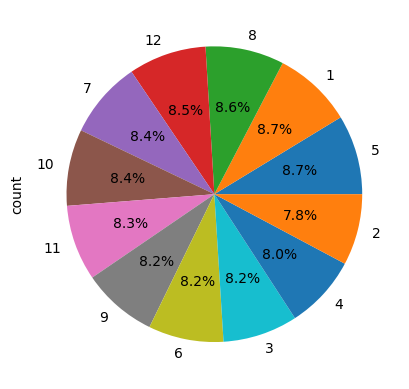

In [44]:
tp["Datetime"].dt.month.value_counts().plot.pie(autopct="%1.1f%%")

<Axes: ylabel='count'>

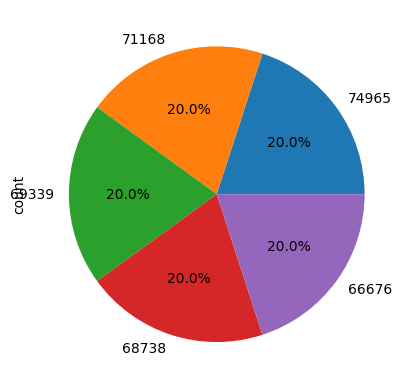

In [45]:
tp_f.head(5).value_counts().plot.pie(autopct="%1.1f%%")

In [46]:
c=tp_f.head(5)
k=(c.keys())
v=np.array(c.values)
v

array([74965, 71168, 69339, 68738, 66676], dtype=int64)

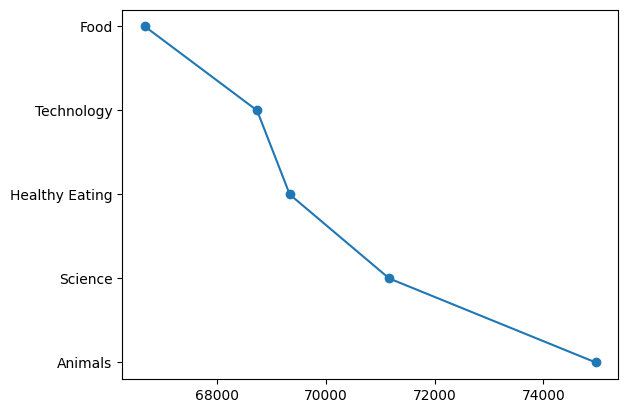

In [47]:
plt.plot(v,k,marker="o")